# 리그오브레전드 챌린저랭크 초반 10분, 15분 데이터를 이용한 승리예측

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./Challenger_Ranked_Games_10minute.csv')

In [3]:
df

,gameId,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,...,redFirstTowerLane,redTowerKills,redMidTowerKills,redTopTowerKills,redBotTowerKills,redInhibitor,redFirstDragon,redDragnoType,redDragon,redRiftHeralds
0,4247263043,0,14870,2889,32,6.4,199,53,0,3,...,[],0,0,0,0,0,1,['WATER_DRAGON'],1,0
1,4247155821,1,14497,2617,33,6.6,229,44,0,2,...,[],0,0,0,0,0,0,[],0,0
2,4243963257,0,15617,1757,34,6.8,223,39,0,3,...,['BOT_LANE'],1,0,0,1,0,1,['FIRE_DRAGON'],1,1
3,4241678498,0,15684,1439,35,7.0,251,64,0,3,...,[],0,0,0,0,0,0,[],0,0
4,4241538868,1,17472,3512,35,7.0,257,46,0,7,...,[],0,0,0,0,0,0,[],0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26404,4143231833,0,16762,5072,36,7.2,206,52,0,7,...,[],0,0,0,0,0,1,['WATER_DRAGON'],1,1
26405,4157911901,0,35765,1440,39,7.8,191,16,0,18,...,[],3,1,0,2,0,0,[],0,0
26406,3764171638,0,15712,4137,34,6.8,218,55,0,3,...,[],0,0,0,0,0,0,[],0,0
26407,4110201724,1,15850,3220,33,6.6,193,48,0,6,...,[],0,0,0,0,0,0,[],0,0


In [4]:
blue_data = df.drop([
    'gameId', 'redWins', 'redTotalGolds', 'redCurrentGolds', 'redTotalLevel', 'redAvgLevel', 'redTotalMinionKills',
    'redTotalJungleMinionKills','redFirstBlood','redKill','redDeath', 'redAssist', 'redWardPlaced', 'redWardKills',
    'redFirstTower', 'redFirstInhibitor', 'redFirstTowerLane', 'redTowerKills','redMidTowerKills', 'redTopTowerKills',
    'redBotTowerKills', 'redInhibitor', 'redFirstDragon', 'redDragnoType', 'redDragon', 'redRiftHeralds'
                    ], axis=1)

## 각 특성간 상관관계 시각화

<AxesSubplot:>

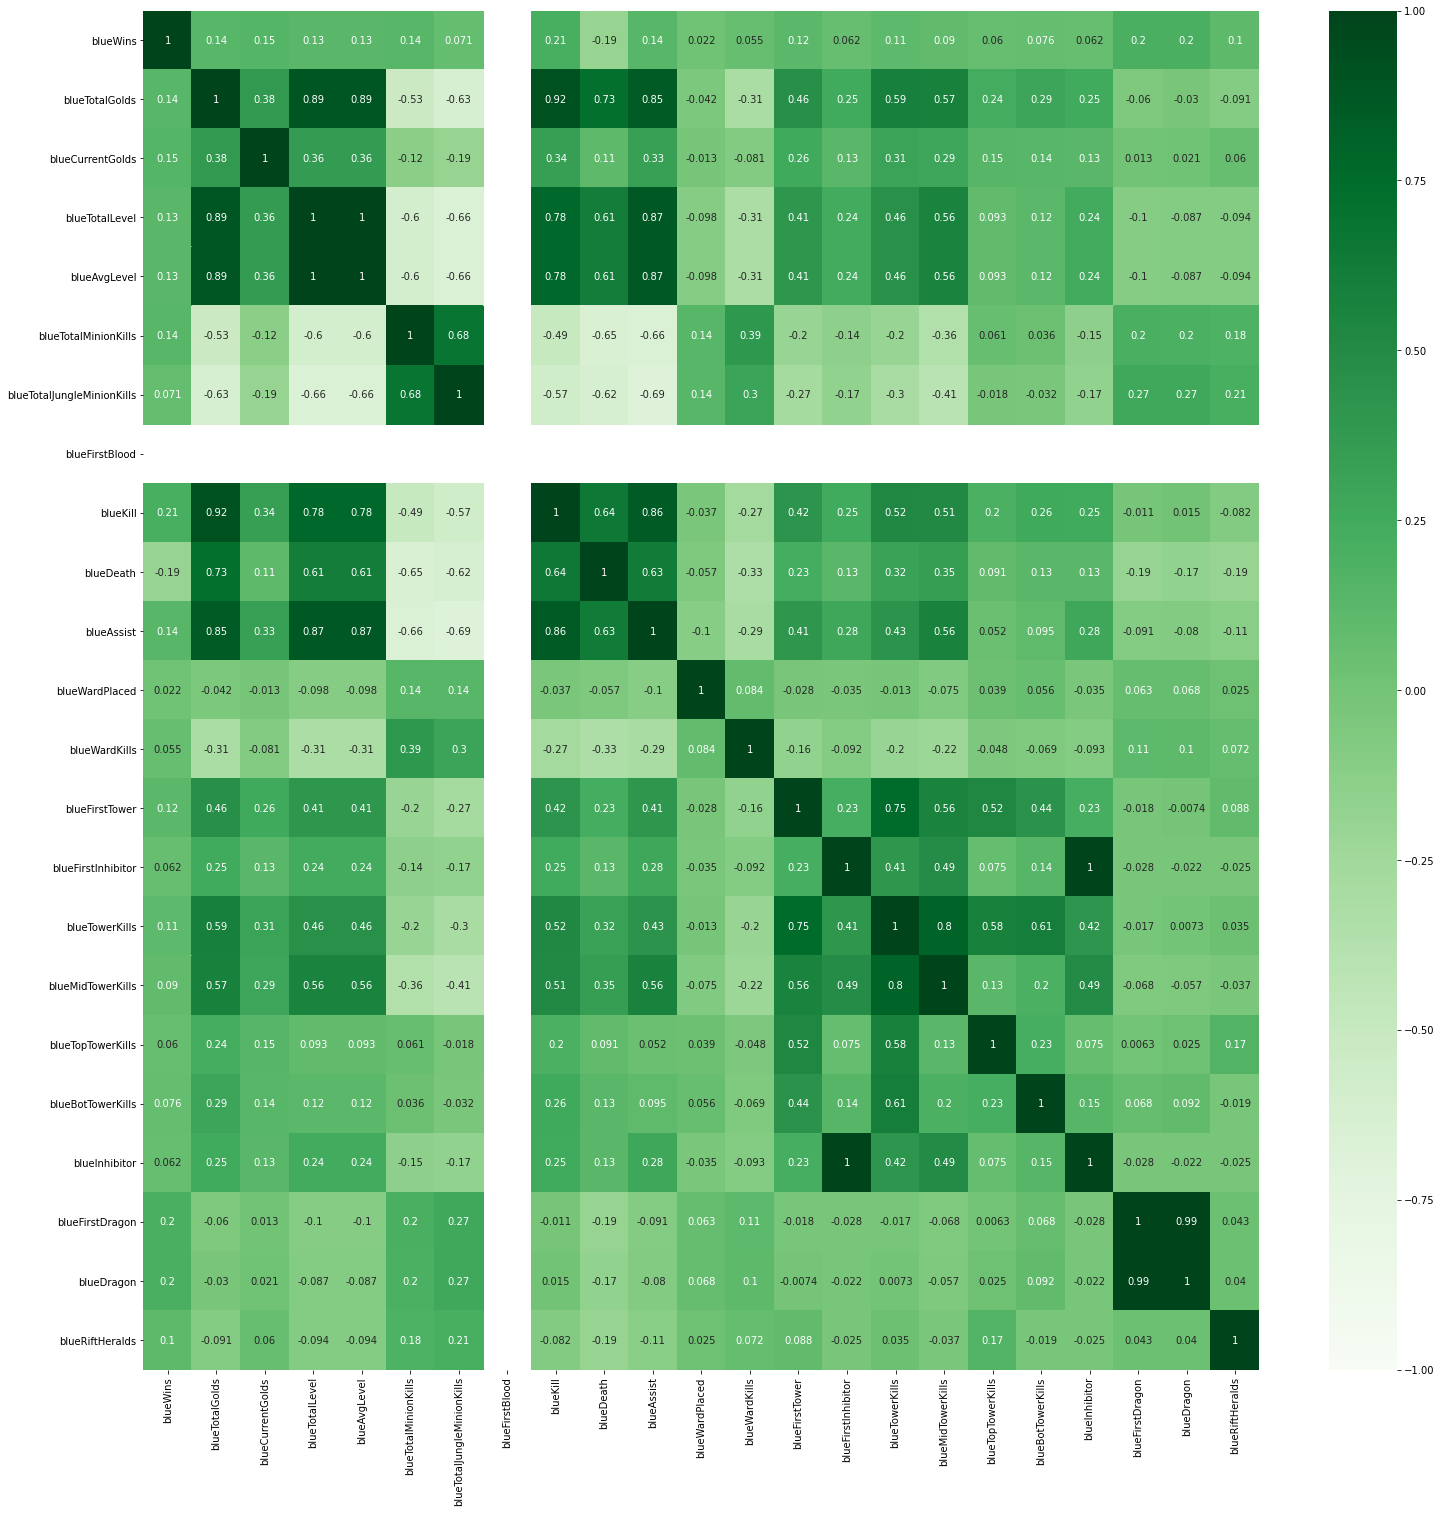

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

heat_df = df.drop(['gameId'], axis=1)

fig = plt.figure(figsize=(25, 25))
sns.heatmap(blue_data.corr(),
           annot = True,
           cmap = 'Greens',
           vmin = -1, vmax=1,)

## 데이터 전처리
비록 RIot api로 받아온 데이터를 한 번 전처리한 데이터지만 아직 모델에 쓰기엔 적합하지 않으므로 전처리 과정이 더 필요하다.
- gameId는 학습에 필요하지 않으므로 제거
- blueWin을 레이블로 사용한다.
    - blue팀 승리 : 1
    - red팀 승리 : 0
- 각 팀의 DragonType은 문자열로 처치한 용의 종류들을 작성해놓았기 때문에 학습에 사용할 수 없다 따라서 다음 column들을 추가한다.
    - {team}AirDragon
    - {team}EarthDragon
    - {team}FireDragon
    - {team}WaterDragon
- 각 팀의 처음 파괴한 포탑의 라인도 문자열로 주어졌기 때문에 어떤 라인의 타워를 먼저 파괴했는지 다음과 같이 column을 추가한다. 각 column이 1인경우 해당 라인의 포탑을 먼저 파괴한것이다.
    - {team}FirstTowerTop
    - {team}FirstTowerMid
    - {team}FirstTowerBot
    

In [6]:
# 데이터 전처리
# Blue 승리를 레이블로 사용 blue팀 승리 : 1, red팀 승리 : 0
df_y = df['blueWins']  
df_x = df.drop(['gameId', 'blueWins', 'redWins'], axis=1)

In [7]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26409 entries, 0 to 26408
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   blueTotalGolds              26409 non-null  int64  
 1   blueCurrentGolds            26409 non-null  int64  
 2   blueTotalLevel              26409 non-null  int64  
 3   blueAvgLevel                26409 non-null  float64
 4   blueTotalMinionKills        26409 non-null  int64  
 5   blueTotalJungleMinionKills  26409 non-null  int64  
 6   blueFirstBlood              26409 non-null  int64  
 7   blueKill                    26409 non-null  int64  
 8   blueDeath                   26409 non-null  int64  
 9   blueAssist                  26409 non-null  int64  
 10  blueWardPlaced              26409 non-null  int64  
 11  blueWardKills               26409 non-null  int64  
 12  blueFirstTower              26409 non-null  int64  
 13  blueFirstInhibitor          264

## 1. 각 팀의 Dragon 타입을 숫자로 바꿔주기
- 각 팀이 잡은 드래곤의 종류가 string형태로 주어졌기 때문에 이를 숫자로 바꿔줘야한다.
- 드래곤 타입에 따라 0, 1, 2, 3과 같은 형태로 주게되면 종류마다 가중치가 주어지는 효과가 나타날 수 있으므로 각 용마다 column을 생성해서 해당 종류를 잡은 횟수를 기록한다.

In [8]:
#  각 팀의 Dragon 타입이 string으로 주어졌기 떄문에 column을 새로 만들어서 int형으로 만든다.
df['blueDragnoType'].unique()

array(['[]', "['WATER_DRAGON']", "['FIRE_DRAGON']", "['EARTH_DRAGON']",
       "['AIR_DRAGON']", "['WATER_DRAGON', 'FIRE_DRAGON']",
       "['AIR_DRAGON', 'WATER_DRAGON']", "['WATER_DRAGON', 'AIR_DRAGON']",
       "['EARTH_DRAGON', 'AIR_DRAGON']",
       "['FIRE_DRAGON', 'WATER_DRAGON']",
       "['EARTH_DRAGON', 'FIRE_DRAGON']",
       "['AIR_DRAGON', 'EARTH_DRAGON']", "['ELDER_DRAGON']",
       "['AIR_DRAGON', 'FIRE_DRAGON']", "['FIRE_DRAGON', 'AIR_DRAGON']",
       "['FIRE_DRAGON', 'EARTH_DRAGON']",
       "['WATER_DRAGON', 'EARTH_DRAGON']",
       "['EARTH_DRAGON', 'WATER_DRAGON']"], dtype=object)

In [9]:
# 잡은 용의 타입이 배열형태가 아닌 하나의 string 형태이기 때문에 토큰화 한 후 각 컬럼에 할당해줘야 한다.
import re

def preprocessing_dragon(df, team='blue'):
    # 각 팀의 용 종류별 잡은 횟수 column 추가
    df[f'{team}AirDragon'] = 0
    df[f'{team}EarthDragon'] = 0
    df[f'{team}FireDragon'] = 0
    df[f'{team}WaterDragon'] = 0
    
    for i, dragon in enumerate(df[f'{team}DragnoType']):
        dragonReg = re.sub('[\'\[\]]', '', dragon)
        for res in dragonReg.split(', '):
            if (res == 'AIR_DRAGON'):
                df[f'{team}AirDragon'][i] += 1
            elif (res == 'EARTH_DRAGON'):
                df[f'{team}EarthDragon'][i] += 1
            elif (res == 'FIRE_DRAGON'):
                df[f'{team}FireDragon'][i] += 1
            elif (res == 'WATER_DRAGON'):
                df[f'{team}WaterDragon'][i] += 1 
    return df.drop([f'{team}DragnoType'], axis=1)

## 2. 각 팀의 처음 파괴한 포탑의 라인을 숫자로 바꿔주기
- 드래곤과 마찬가지로 string형태로 주어졌다.
- Top, Mid, Bot에 각각 1, 2, 3을 주게 된다면 마찬가지로 가중치가 주어지는것과 같은 효과가 나타날 수 있으므로 각 라인에 대한 컬럼을 추가한다.

In [10]:
df['blueFirstTowerLane'].unique()

array(['[]', "['BOT_LANE']", "['TOP_LANE']", "['MID_LANE']"], dtype=object)

In [11]:
# 처음 파괴한 포탑에 대한 전처리
def preprocessing_tower(df, team='blue'):
    df[f'{team}FirstTowerTop'] = 0
    df[f'{team}FirstTowerMid'] = 0
    df[f'{team}FirstTowerBot'] = 0
    
    for i, lane in enumerate(df[f'{team}FirstTowerLane']):
        towerReg = re.sub('[\'\[\]]', '', lane)
        if (towerReg == 'TOP_LANE'):
            df[f'{team}FirstTowerTop'][i] = 1
        elif (towerReg == 'MID_LANE'):
            df[f'{team}FirstTowerMid'][i] = 1
        elif (towerReg == 'BOT_LANE'):
            df[f'{team}FirstTowerBot'][i] = 1
    return df.drop([f'{team}FirstTowerLane'], axis=1)

In [12]:
df_x = preprocessing_dragon(df_x, team='blue')
df_x = preprocessing_dragon(df_x, team='red')
df_x = preprocessing_tower(df_x, team='blue')
df_x = preprocessing_tower(df_x, team='red')

c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [13]:
df_x

,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,blueDeath,blueAssist,...,redAirDragon,redEarthDragon,redFireDragon,redWaterDragon,blueFirstTowerTop,blueFirstTowerMid,blueFirstTowerBot,redFirstTowerTop,redFirstTowerMid,redFirstTowerBot
0,14870,2889,32,6.4,199,53,0,3,9,7,...,0,0,0,1,0,0,0,0,0,0
1,14497,2617,33,6.6,229,44,0,2,3,2,...,0,0,0,0,0,0,0,0,0,0
2,15617,1757,34,6.8,223,39,0,3,11,4,...,0,0,1,0,0,0,0,0,0,1
3,15684,1439,35,7.0,251,64,0,3,4,2,...,0,0,0,0,0,0,0,0,0,0
4,17472,3512,35,7.0,257,46,0,7,5,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26404,16762,5072,36,7.2,206,52,0,7,5,9,...,0,0,0,1,0,0,0,0,0,0
26405,35765,1440,39,7.8,191,16,0,18,27,17,...,0,0,0,0,1,0,0,0,0,0
26406,15712,4137,34,6.8,218,55,0,3,0,4,...,0,0,0,0,0,0,0,0,0,0
26407,15850,3220,33,6.6,193,48,0,6,4,14,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# 데이터 정규화
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

mm_df_x = mms.fit_transform(df_x)

## 실험 1 Support Vector Machine
- 고전 머신러닝 기법중 성능이 잘 나왔다는 SVM을 사용해보았다

In [22]:
from sklearn import svm

clf = svm.SVC()
clf.fit(mm_df_x[:23000], df_y[:23000])

SVC()

In [51]:
res = clf.predict(mm_df_x[23000:])
cmp = []
for i, y in enumerate(df_y[23000:]):
    if y == res[i]:
        cmp.append(1)
    else:
        cmp.append(0)

### 결과
애석하게도 약 73퍼센트의 정확도를 보인다

In [53]:
hit = 0
total = 0

for i, cp in enumerate(cmp):
    if cp == 1:
        hit += 1
    total += 1
    
print(hit / total)

0.7295394543854503


## 실험 2 K-Means Clustering
- 레이블이 두 종류이고 특성이 많기 때문에 클러스터링도 해보았다.

In [24]:
# clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(mm_df_x)

KMeans(n_clusters=2)

In [61]:
pd = kmeans.labels_

### 결과
SVM보다 더 안좋은 약 60퍼센트의 정확도를 보인다

In [65]:
hit = 0
total = 0

for i, cp in enumerate(df_y):
    if cp == pd[i]:
        hit += 1
    total += 1
    
print(hit / total)

0.5999091218902647


## 실험 3 RNN
이 노트북엔 없지만 전에 비슷한 데이터로 Fully Connected Neural Network로 실험한적이 있었다.</br>
그 당시 Loss는 약 45%, Accuracy는 약 75%가 나왔었다.</br>
그렇다면 RNN은 어떤 결과를 보일지 실험해보았다.

In [66]:
# RNN
import tensorflow as tf
from keras.callbacks import ReduceLROnPlateau

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                           patience=2,
                                           verbose=1,
                                           factor=0.25,
                                           min_lr=0.0000003)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, activation='tanh', recurrent_activation='sigmoid', recurrent_dropout=0, unroll=False, use_bias=True, input_shape=(58, 1)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\requests\__init__.py:80: RequestsDependencyWarning: urllib3 (1.26.4) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [67]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam', 
    metrics=['accuracy'],
)

In [68]:
history = model.fit(
    mm_df_x[:23000].reshape(-1, 58, 1),
    df_y[:23000],
    epochs=20, 
    batch_size=32,
    validation_data=(mm_df_x[23000:].reshape(-1, 58, 1), df_y[23000:]),
    callbacks=[learning_rate_reduction, early_stop],
)

Epoch 1/20
719/719 [==============================] - 12s 9ms/step - loss: 0.6499 - accuracy: 0.6056 - val_loss: 0.6048 - val_accuracy: 0.6524
Epoch 2/20
719/719 [==============================] - 6s 8ms/step - loss: 0.5984 - accuracy: 0.6809 - val_loss: 0.5798 - val_accuracy: 0.6973
Epoch 3/20
719/719 [==============================] - 6s 8ms/step - loss: 0.5858 - accuracy: 0.6911 - val_loss: 0.5963 - val_accuracy: 0.6732
Epoch 4/20
719/719 [==============================] - 6s 8ms/step - loss: 0.5784 - accuracy: 0.6937 - val_loss: 0.5657 - val_accuracy: 0.7046
Epoch 5/20
719/719 [==============================] - 6s 8ms/step - loss: 0.5698 - accuracy: 0.7014 - val_loss: 0.5755 - val_accuracy: 0.7055
Epoch 6/20
719/719 [==============================] - 6s 9ms/step - loss: 0.5702 - accuracy: 0.7002 - val_loss: 0.5656 - val_accuracy: 0.7011
Epoch 7/20
719/719 [==============================] - 6s 9ms/step - loss: 0.5710 - accuracy: 0.6985 - val_loss: 0.5603 - val_accuracy: 0.7052

Epoc

### 결과
FCNN때와 비슷한 결과다

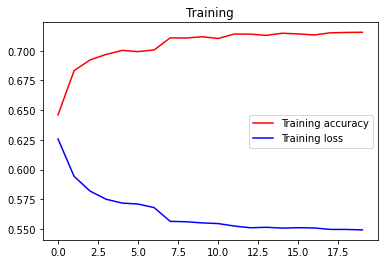

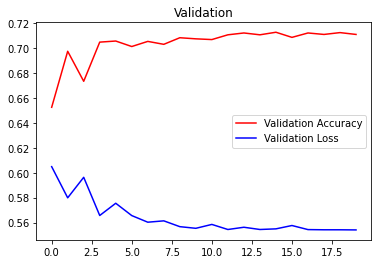

In [69]:
# 학습결과 시각화
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.title('Train graph with LSTM')
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training')
plt.legend()
plt.figure()

plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Validation')
plt.legend()

plt.show()

In [12]:
df15 = pd.read_csv('./Challenger_Ranked_Games_15minute.csv')

In [13]:
df15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26834 entries, 0 to 26833
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gameId                      26834 non-null  int64  
 1   blueWins                    26834 non-null  int64  
 2   blueTotalGolds              26834 non-null  int64  
 3   blueCurrentGolds            26834 non-null  int64  
 4   blueTotalLevel              26834 non-null  int64  
 5   blueAvgLevel                26834 non-null  float64
 6   blueTotalMinionKills        26834 non-null  int64  
 7   blueTotalJungleMinionKills  26834 non-null  int64  
 8   blueFirstBlood              26834 non-null  int64  
 9   blueKill                    26834 non-null  int64  
 10  blueDeath                   26834 non-null  int64  
 11  blueAssist                  26834 non-null  int64  
 12  blueWardPlaced              26834 non-null  int64  
 13  blueWardKills               268

In [14]:
df15_y = df15['blueWins']  
df15_x = df15.drop(['gameId', 'blueWins', 'redWins'], axis=1)

In [15]:
df15_x = preprocessing_dragon(df15_x, team='blue')
df15_x = preprocessing_dragon(df15_x, team='red')
df15_x = preprocessing_tower(df15_x, team='blue')
df15_x = preprocessing_tower(df15_x, team='red')

c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [20]:
# 데이터 정규화
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

mm_df15_x = mms.fit_transform(df15_x)

## 0521 FCNN 실험1

Epoch 1/20
1438/1438 [==============================] - 11s 7ms/step - loss: 0.5348 - accuracy: 0.7570 - val_loss: 0.4483 - val_accuracy: 0.7924
Epoch 2/20
1438/1438 [==============================] - 10s 7ms/step - loss: 0.4686 - accuracy: 0.7789 - val_loss: 0.4442 - val_accuracy: 0.7937
Epoch 3/20
1438/1438 [==============================] - 10s 7ms/step - loss: 0.4577 - accuracy: 0.7865 - val_loss: 0.4530 - val_accuracy: 0.7916
Epoch 4/20
1438/1438 [==============================] - 10s 7ms/step - loss: 0.4522 - accuracy: 0.7892 - val_loss: 0.4461 - val_accuracy: 0.7890

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 5/20
1438/1438 [==============================] - 10s 7ms/step - loss: 0.4436 - accuracy: 0.7899 - val_loss: 0.4337 - val_accuracy: 0.7966
Epoch 6/20
1438/1438 [==============================] - 10s 7ms/step - loss: 0.4392 - accuracy: 0.7937 - val_loss: 0.4302 - val_accuracy: 0.8020
Epoch 7/20
1438/1438 [===========================

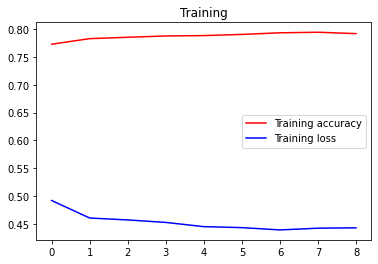

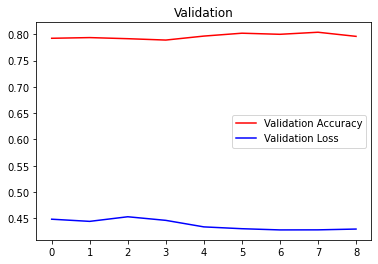

In [35]:
# 양식
import tensorflow as tf
from keras.callbacks import ReduceLROnPlateau
import tensorflow_addons as tfa

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                           patience=2,
                                           verbose=1,
                                           factor=0.25,
                                           min_lr=0.0000003)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation=tf.keras.layers.LeakyReLU(alpha=0.2), input_shape=(1, 58), activity_regularizer=tf.keras.regularizers.L2(0.03)),
    tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.Dense(256, activation=tf.keras.layers.LeakyReLU(alpha=0.2), activity_regularizer=tf.keras.regularizers.L2(0.03)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer=tfa.optimizers.AdamW(weight_decay=1e-4), 
    metrics=['accuracy'],
)

history = model.fit(
    mm_df15_x[:23000].reshape(-1, 1, 58),
    df15_y[:23000],
    epochs=20, 
    batch_size=16,
    validation_data=(mm_df15_x[23000:].reshape(-1, 1, 58), df15_y[23000:]),
    callbacks=[learning_rate_reduction, early_stop],
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.title('Train graph with LSTM')
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training')
plt.legend()
plt.figure()

plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Validation')
plt.legend()

plt.show()
plt.close()

## 0521 FCNN 실험2

Epoch 1/20
719/719 [==============================] - 6s 8ms/step - loss: 0.5741 - accuracy: 0.7635 - val_loss: 0.4738 - val_accuracy: 0.7846
Epoch 2/20
719/719 [==============================] - 5s 8ms/step - loss: 0.4628 - accuracy: 0.7938 - val_loss: 0.4621 - val_accuracy: 0.7874
Epoch 3/20
719/719 [==============================] - 5s 7ms/step - loss: 0.4423 - accuracy: 0.8008 - val_loss: 0.4574 - val_accuracy: 0.7861
Epoch 4/20
719/719 [==============================] - 6s 8ms/step - loss: 0.4389 - accuracy: 0.7952 - val_loss: 0.4476 - val_accuracy: 0.7942
Epoch 5/20
719/719 [==============================] - 6s 8ms/step - loss: 0.4404 - accuracy: 0.7980 - val_loss: 0.4613 - val_accuracy: 0.7809
Epoch 6/20
719/719 [==============================] - 6s 8ms/step - loss: 0.4340 - accuracy: 0.7985 - val_loss: 0.4404 - val_accuracy: 0.7958
Epoch 7/20
719/719 [==============================] - 6s 8ms/step - loss: 0.4366 - accuracy: 0.7986 - val_loss: 0.5655 - val_accuracy: 0.7254
Epoch 

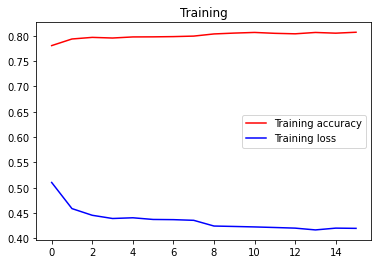

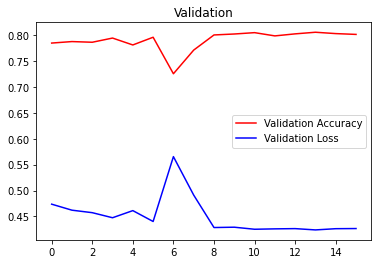

In [36]:
# 양식
import tensorflow as tf
from keras.callbacks import ReduceLROnPlateau
import tensorflow_addons as tfa

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                           patience=2,
                                           verbose=1,
                                           factor=0.25,
                                           min_lr=0.0000003)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_shape=(1, 58), activity_regularizer=tf.keras.regularizers.L2(0.03)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation='relu'),
    # tf.keras.layers.Dense(256, activation=tf.keras.layers.LeakyReLU(alpha=0.2), activity_regularizer=tf.keras.regularizers.L2(0.03)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer=tfa.optimizers.AdamW(weight_decay=1e-4), 
    metrics=['accuracy'],
)

history = model.fit(
    mm_df15_x[:23000].reshape(-1, 1, 58),
    df15_y[:23000],
    epochs=20, 
    batch_size=32,
    validation_data=(mm_df15_x[23000:].reshape(-1, 1, 58), df15_y[23000:]),
    callbacks=[learning_rate_reduction, early_stop],
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.title('Train graph with LSTM')
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training')
plt.legend()
plt.figure()

plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Validation')
plt.legend()

plt.show()
plt.close()

In [37]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 1, 256)            15104     
_________________________________________________________________
batch_normalization_9 (Batch (None, 1, 256)            1024      
_________________________________________________________________
activation (Activation)      (None, 1, 256)            0         
_________________________________________________________________
dense_35 (Dense)             (None, 1, 1)              257       
Total params: 16,385
Trainable params: 15,873
Non-trainable params: 512
_________________________________________________________________


## 0521 FCNN 실험3

Epoch 1/20
719/719 [==============================] - 8s 10ms/step - loss: 1.1758 - accuracy: 0.7448 - val_loss: 0.6290 - val_accuracy: 0.7874
Epoch 2/20
719/719 [==============================] - 7s 10ms/step - loss: 0.5983 - accuracy: 0.7859 - val_loss: 0.5421 - val_accuracy: 0.7911
Epoch 3/20
719/719 [==============================] - 7s 10ms/step - loss: 0.5279 - accuracy: 0.7875 - val_loss: 0.4933 - val_accuracy: 0.7929
Epoch 4/20
719/719 [==============================] - 7s 10ms/step - loss: 0.4724 - accuracy: 0.7979 - val_loss: 0.5082 - val_accuracy: 0.7715
Epoch 5/20
719/719 [==============================] - 7s 10ms/step - loss: 0.4629 - accuracy: 0.7969 - val_loss: 0.4648 - val_accuracy: 0.7947
Epoch 6/20
719/719 [==============================] - 7s 10ms/step - loss: 0.4474 - accuracy: 0.7995 - val_loss: 0.4683 - val_accuracy: 0.7851
Epoch 7/20
719/719 [==============================] - 7s 10ms/step - loss: 0.4492 - accuracy: 0.7966 - val_loss: 0.4678 - val_accuracy: 0.7851

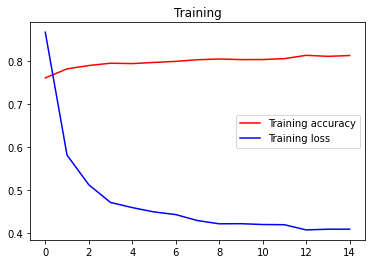

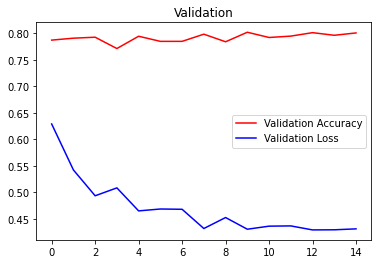

In [38]:
# 양식
import tensorflow as tf
from keras.callbacks import ReduceLROnPlateau
import tensorflow_addons as tfa

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                           patience=2,
                                           verbose=1,
                                           factor=0.25,
                                           min_lr=0.0000003)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_shape=(1, 58), activity_regularizer=tf.keras.regularizers.L2(0.03)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation='relu'),
    tf.keras.layers.Dense(256, activity_regularizer=tf.keras.regularizers.L2(0.03)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer=tfa.optimizers.AdamW(weight_decay=1e-4), 
    metrics=['accuracy'],
)

history = model.fit(
    mm_df15_x[:23000].reshape(-1, 1, 58),
    df15_y[:23000],
    epochs=20, 
    batch_size=32,
    validation_data=(mm_df15_x[23000:].reshape(-1, 1, 58), df15_y[23000:]),
    callbacks=[learning_rate_reduction, early_stop],
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.title('Train graph with LSTM')
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training')
plt.legend()
plt.figure()

plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Validation')
plt.legend()

plt.show()
plt.close()

In [ ]:
# 양식
import tensorflow as tf
from keras.callbacks import ReduceLROnPlateau
import tensorflow_addons as tfa

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                           patience=2,
                                           verbose=1,
                                           factor=0.25,
                                           min_lr=0.0000003)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_shape=(1, 58), activity_regularizer=tf.keras.regularizers.L2(0.03)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation='relu'),
    tf.keras.layers.Dense(256, activity_regularizer=tf.keras.regularizers.L2(0.03)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation='relu'),
    tf.keras.layers.Dense(128, activity_regularizer=tf.keras.regularizers.L2(0.03)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer=tfa.optimizers.AdamW(weight_decay=1e-4), 
    metrics=['accuracy'],
)

history = model.fit(
    mm_df15_x[:23000].reshape(-1, 1, 58),
    df15_y[:23000],
    epochs=20, 
    batch_size=32,
    validation_data=(mm_df15_x[23000:].reshape(-1, 1, 58), df15_y[23000:]),
    callbacks=[learning_rate_reduction, early_stop],
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.title('Train graph with LSTM')
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training')
plt.legend()
plt.figure()

plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Validation')
plt.legend()

plt.show()
plt.close()

In [146]:
# RNN
import tensorflow as tf
from keras.callbacks import ReduceLROnPlateau
import tensorflow_addons as tfa

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                           patience=2,
                                           verbose=1,
                                           factor=0.25,
                                           min_lr=0.0000003)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(512, activation='tanh', recurrent_activation='sigmoid', recurrent_dropout=0, unroll=False, use_bias=True, input_shape=(58, 1)),
    tf.keras.layers.Dense(256, activation=tf.keras.layers.LeakyReLU(alpha=0.2)),
    tf.keras.layers.Dense(256, activation=tf.keras.layers.LeakyReLU(alpha=0.2)),
    # tf.keras.layers.Dense(32, activation=tf.keras.layers.LeakyReLU(alpha=0.2)),
    # tf.keras.layers.Dense(32, activation=tf.keras.layers.LeakyReLU(alpha=0.2)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [147]:
model.compile(
    loss='binary_crossentropy',
    optimizer=tfa.optimizers.AdamW(weight_decay=1e-4), 
    metrics=['accuracy'],
)

In [148]:
history = model.fit(
    mm_df15_x[:23000].reshape(-1, 58, 1),
    df15_y[:23000],
    epochs=20, 
    batch_size=8,
    validation_data=(mm_df15_x[23000:].reshape(-1, 58, 1), df15_y[23000:]),
    callbacks=[learning_rate_reduction, early_stop],
)

Epoch 1/20
2875/2875 [==============================] - 30s 10ms/step - loss: 0.6418 - accuracy: 0.6494 - val_loss: 0.6059 - val_accuracy: 0.6883
Epoch 2/20
2875/2875 [==============================] - 29s 10ms/step - loss: 0.6163 - accuracy: 0.6682 - val_loss: 0.6993 - val_accuracy: 0.5037
Epoch 3/20
2875/2875 [==============================] - 31s 11ms/step - loss: 0.6937 - accuracy: 0.5027 - val_loss: 0.6915 - val_accuracy: 0.4963

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 4/20
2875/2875 [==============================] - 30s 10ms/step - loss: 0.6446 - accuracy: 0.6277 - val_loss: 0.5943 - val_accuracy: 0.6844
Epoch 5/20
2875/2875 [==============================] - 30s 10ms/step - loss: 0.5947 - accuracy: 0.6845 - val_loss: 0.5879 - val_accuracy: 0.6896
Epoch 6/20
2875/2875 [==============================] - 30s 10ms/step - loss: 0.5890 - accuracy: 0.6946 - val_loss: 0.5798 - val_accuracy: 0.6985
Epoch 7/20
2875/2875 [=====================

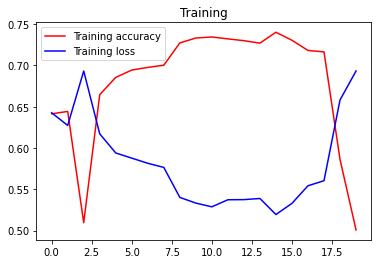

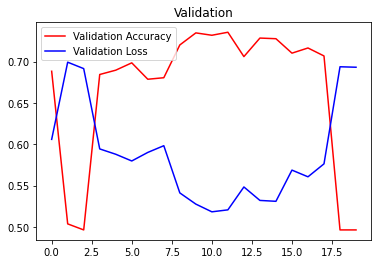

In [153]:
# 1번 
#model = tf.keras.Sequential([
#    tf.keras.layers.LSTM(128, activation='tanh', recurrent_activation='sigmoid', recurrent_dropout=0, unroll=False, use_bias=True, input_shape=(58, 1)),
#    tf.keras.layers.Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.2)),
#    tf.keras.layers.Dense(1, activation='sigmoid')
#])
# batch 32
import matplotlib.pyplot as plt

history_RNN_2layers = history

acc = history_RNN_2layers.history['accuracy']
val_acc = history_RNN_2layers.history['val_accuracy']
loss = history_RNN_2layers.history['loss']
val_loss = history_RNN_2layers.history['val_loss']

epochs = range(len(acc))

plt.title('Train graph with LSTM')
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training')
plt.legend()
plt.figure()

plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Validation')
plt.legend()

plt.show()
plt.close()

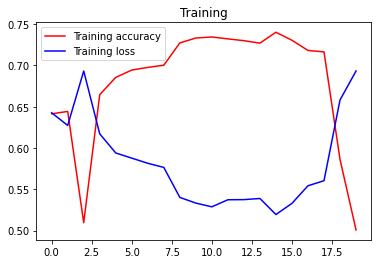

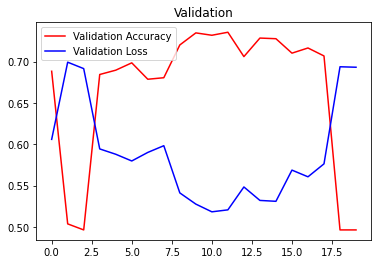

In [152]:
# 2번
#model = tf.keras.Sequential([
#    tf.keras.layers.LSTM(1024, activation='tanh', recurrent_activation='sigmoid', recurrent_dropout=0, unroll=False, use_bias=True, input_shape=(58, 1)),
#    tf.keras.layers.Dense(512, activation=tf.keras.layers.LeakyReLU(alpha=0.2)),
#    tf.keras.layers.Dense(256, activation=tf.keras.layers.LeakyReLU(alpha=0.2)),
#    tf.keras.layers.Dense(1, activation='sigmoid')
#])
# batch_size : 32
import matplotlib.pyplot as plt

history_RNN_huge = history

acc = history_RNN_huge.history['accuracy']
val_acc = history_RNN_huge.history['val_accuracy']
loss = history_RNN_huge.history['loss']
val_loss = history_RNN_huge.history['val_loss']

epochs = range(len(acc))

plt.title('Train graph with LSTM')
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training')
plt.legend()
plt.figure()

plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Validation')
plt.legend()

plt.show()
plt.close()

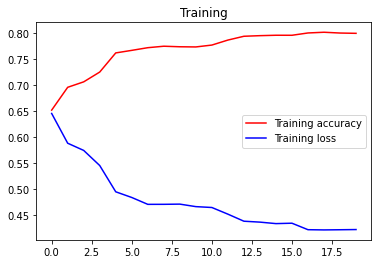

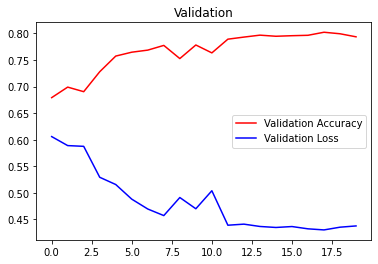

In [154]:
# 3번
#model = tf.keras.Sequential([
#    tf.keras.layers.LSTM(512, activation='tanh', recurrent_activation='sigmoid', recurrent_dropout=0, unroll=False, use_bias=True, input_shape=(58, 1)),
#    tf.keras.layers.Dense(256, activation=tf.keras.layers.LeakyReLU(alpha=0.2)),
#    tf.keras.layers.Dense(256, activation=tf.keras.layers.LeakyReLU(alpha=0.2)),
#    tf.keras.layers.Dense(1, activation='sigmoid')
#])
# batch_size : 32


history_RNN_LSTM512_Dense256

acc = history_RNN_LSTM512_Dense256.history['accuracy']
val_acc = history_RNN_LSTM512_Dense256.history['val_accuracy']
loss = history_RNN_LSTM512_Dense256.history['loss']
val_loss = history_RNN_LSTM512_Dense256.history['val_loss']

epochs = range(len(acc))

plt.title('Train graph with LSTM')
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training')
plt.legend()
plt.figure()

plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Validation')
plt.legend()

plt.show()
plt.close()

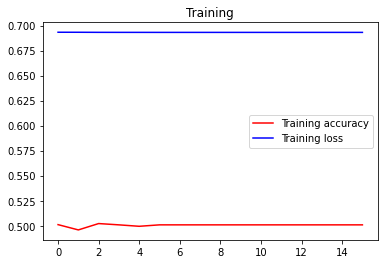

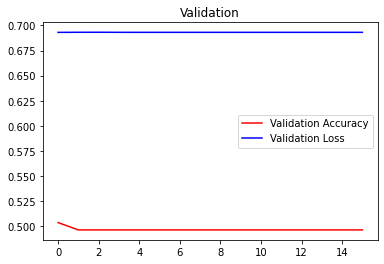

In [155]:
# 4번
#model = tf.keras.Sequential([
#    tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.2), input_shape=(58, 1)),
#    tf.keras.layers.Dense(256, activation=tf.keras.layers.LeakyReLU(alpha=0.2)),
#    tf.keras.layers.Dense(256, activation=tf.keras.layers.LeakyReLU(alpha=0.2)),
#    tf.keras.layers.Dense(1, activation='sigmoid')
#])

# batch_size : 32

history4

acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(len(acc))

plt.title('Train graph with LSTM')
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training')
plt.legend()
plt.figure()

plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Validation')
plt.legend()

plt.show()
plt.close()

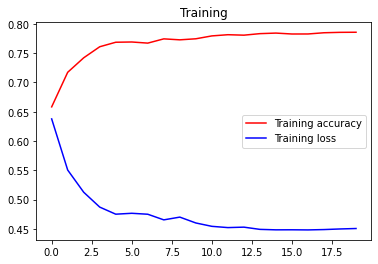

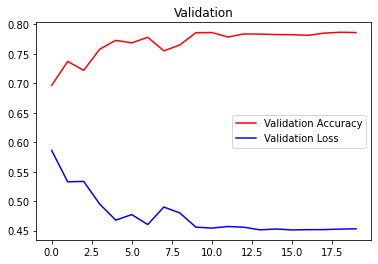

In [156]:
# 5번
#model = tf.keras.Sequential([
#    tf.keras.layers.LSTM(512, activation='tanh', recurrent_activation='sigmoid', recurrent_dropout=0, unroll=False, use_bias=True, input_shape=(58, 1)),
#    tf.keras.layers.Dense(256, activation=tf.keras.layers.LeakyReLU(alpha=0.2)),
#    tf.keras.layers.Dense(256, activation=tf.keras.layers.LeakyReLU(alpha=0.2)),
#    tf.keras.layers.Dense(1, activation='sigmoid')
#])

# batch_size : 256

hisotry5_batch_256

acc = hisotry5_batch_256.history['accuracy']
val_acc = hisotry5_batch_256.history['val_accuracy']
loss = hisotry5_batch_256.history['loss']
val_loss = hisotry5_batch_256.history['val_loss']

epochs = range(len(acc))

plt.title('Train graph with LSTM')
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training')
plt.legend()
plt.figure()

plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Validation')
plt.legend()

plt.show()
plt.close()

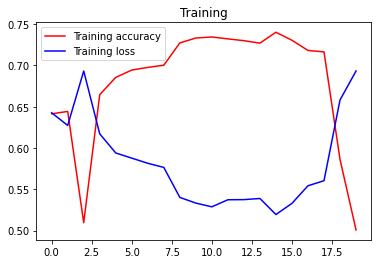

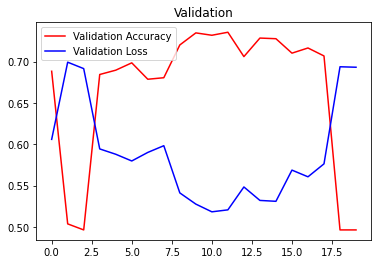

In [157]:
# 6번
# 5번과 코드 동일 batchsize 8

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.title('Train graph with LSTM')
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training')
plt.legend()
plt.figure()

plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Validation')
plt.legend()

plt.show()
plt.close()

### Loss function == MSE

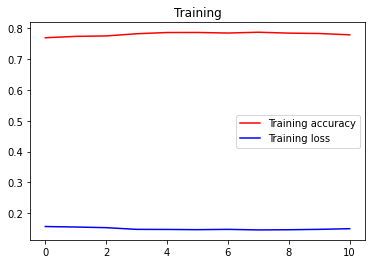

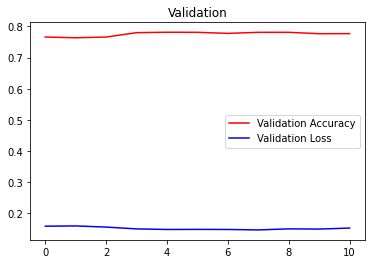

In [104]:
# 학습결과 시각화
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.title('Train graph with LSTM')
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training')
plt.legend()
plt.figure()

plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Validation')
plt.legend()

plt.show()

In [105]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(mm_df15_x[23000:].reshape(-1, 58, 1))

y_pred_binary = []

for i in y_pred:
    if i >= 0.5:
        y_pred_binary.append(1)
    else:
        y_pred_binary.append(0)
        
confmat = confusion_matrix(y_true=df15_y[23000:], y_pred=y_pred_binary)

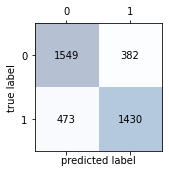

In [106]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
               s=confmat[i, j],
               va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.tight_layout()
plt.show()

In [107]:
print('정밀도 : %.3f' % precision_score(
    y_true=df15_y[23000:],
    y_pred=y_pred_binary
))
      
print('재현율: %.3f' % recall_score(
    y_true=df15_y[23000:],
    y_pred=y_pred_binary
))
      
print('F1: %.3f' % f1_score(
    y_true=df15_y[23000:],
    y_pred=y_pred_binary
))

정밀도 : 0.789
재현율: 0.751
F1: 0.770


### Loss function == binary crossentropy

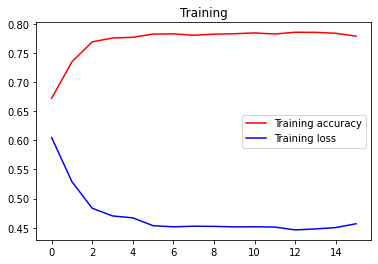

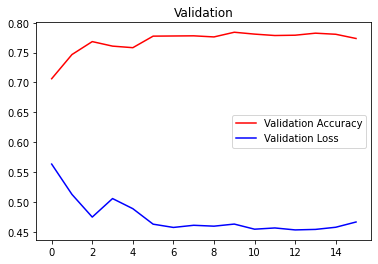

In [93]:
# 학습결과 시각화
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.title('Train graph with LSTM')
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training')
plt.legend()
plt.figure()

plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Validation')
plt.legend()

plt.show()

In [96]:
y_pred_binary = []

for i in y_pred:
    if i >= 0.5:
        y_pred_binary.append(1)
    else:
        y_pred_binary.append(0)

In [97]:
confmat = confusion_matrix(y_true=df15_y[23000:], y_pred=y_pred_binary)

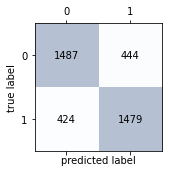

In [98]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
               s=confmat[i, j],
               va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.tight_layout()
plt.show()

In [99]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

In [101]:
print('정밀도 : %.3f' % precision_score(
    y_true=df15_y[23000:],
    y_pred=y_pred_binary
))
      
print('재현율: %.3f' % recall_score(
    y_true=df15_y[23000:],
    y_pred=y_pred_binary
))
      
print('F1: %.3f' % f1_score(
    y_true=df15_y[23000:],
    y_pred=y_pred_binary
))

정밀도 : 0.769
재현율: 0.777
F1: 0.773
